In [1]:
import re
import csv
# import spacy
import pandas as pd
# import en_core_web_sm
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from datetime import datetime as dt
from reduce_memory_df import optimize_mem_usage

# nlp = en_core_web_sm.load()
pd.options.display.max_columns = None

In [12]:
df = pd.read_csv('data/amazon_reviews_us_Grocery_v1_00.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [13]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402458 entries, 0 to 2402457
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   marketplace        2402458 non-null  object
 1   customer_id        2402458 non-null  int64 
 2   review_id          2402458 non-null  object
 3   product_id         2402458 non-null  object
 4   product_parent     2402458 non-null  int64 
 5   product_title      2402458 non-null  object
 6   product_category   2402458 non-null  object
 7   star_rating        2402458 non-null  int64 
 8   helpful_votes      2402458 non-null  int64 
 9   total_votes        2402458 non-null  int64 
 10  vine               2402458 non-null  object
 11  verified_purchase  2402458 non-null  object
 12  review_headline    2402447 non-null  object
 13  review_body        2402393 non-null  object
 14  review_date        2402458 non-null  object
dtypes: int64(5), object(10)
memory usage: 274.9+ MB


In [14]:
df.nunique()

marketplace                1
customer_id          1363986
review_id            2402458
product_id            305512
product_parent        268150
product_title         273649
product_category           1
star_rating                5
helpful_votes            564
total_votes              603
vine                       2
verified_purchase          2
review_headline      1273804
review_body          2226078
review_date             4404
dtype: int64

In [15]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,N,Y,Five Stars,good,2015-08-31


### Inspect the "not a number" or NaN values (aka null values)

In [16]:
print(df[df.review_body.isna()].shape)
df[df.review_body.isna()].head()

(65, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4451,US,14526893,R1H6DCLMHV382W,B005DN3DC6,292356201,Iaso Tea,Grocery,5,0,3,N,N,You Can Do It!,NaN,2015-08-30
8099,US,14534983,R110WTSH3MYZGW,B0080IIKM4,467236352,"Quaker Plain Unsalted Rice Cake, 4.47 oz, 3 pk",Grocery,1,2,3,N,Y,One Star,NaN,2015-08-29
10946,US,18074592,R2QAQ5GE1TM8LV,B00XSAJXVQ,22560023,Matcha Green Tea Powder,Grocery,4,0,0,N,Y,Four Stars,NaN,2015-08-28
27412,US,2226545,R2J0MZ19BSXZK0,B00991O4NA,992865454,Single Source Party Supply - Sock Monkey Edibl...,Grocery,5,2,2,N,Y,Five Stars,NaN,2015-08-22
37969,US,47506113,R1EK1A4EAP06W6,B00991QGOA,272125398,Single Source Party Supply - Willy Wonka Edibl...,Grocery,5,0,0,N,Y,Five Stars,NaN,2015-08-18


In [17]:
print(df[df.review_headline.isna()].shape)
df[df.review_headline.isna()].head()

(11, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
181503,US,1003646,R227ZKLKQEM2X,B00I08J6S6,760957009,Tully's Coffee French Roast K-cup for Keurig B...,Grocery,5,0,0,N,Y,NaN,Although the product once delivered is always ...,2015-06-29
345827,US,50649712,R37IE7ME43YZA5,B002UQSSHO,154376421,N'JOY Coffee Creamer - 8/16oz Canisters,Grocery,4,0,0,N,Y,NaN,product itself is fine. however the packing le...,2015-05-03
489543,US,51045315,RTUNWNWU730DE,B00DWHNTJM,880397874,Tassimo Petit Dej 16 Pods,Grocery,5,0,0,N,Y,NaN,What can I say - it's coffee!,2015-03-16
511846,US,13305115,R3NWQMCPTWCH9J,B000F4DKB2,280207419,Twinings,Grocery,3,0,0,N,Y,NaN,"I didn't realize this was decaf, but, the flav...",2015-03-10
567751,US,35536171,R362OV7ATOGIO7,B008EM0JMU,489382572,Hidden Springs Maple Vermont Maple Syrup,Grocery,4,0,0,N,Y,NaN,good syrup,2015-02-22


### Combine review headline and body into a single review column

In [32]:
df.fillna('', inplace=True)
df['review'] = (df.review_headline + ' ' + df.review_body).str.strip()

#### Drop uneeded columns

In [33]:
df.drop(['marketplace','product_category','review_headline','review_body'], axis=1, inplace=True)

#### Reduce memory profile

In [36]:
optimize_mem_usage(df)

Memory usage of dataframe is 1,923,042,598 bytes
Memory usage after optimization is: 1,232,798,498 bytes
Decreased by -35.89%


In [37]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402458 entries, 0 to 2402457
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   customer_id        2402458 non-null  int32   
 1   review_id          2402458 non-null  category
 2   product_id         2402458 non-null  category
 3   product_parent     2402458 non-null  int32   
 4   product_title      2402458 non-null  category
 5   star_rating        2402458 non-null  int8    
 6   helpful_votes      2402458 non-null  int16   
 7   total_votes        2402458 non-null  int16   
 8   vine               2402458 non-null  category
 9   verified_purchase  2402458 non-null  category
 10  review_date        2402458 non-null  category
 11  review             2402458 non-null  category
dtypes: category(7), int16(2), int32(2), int8(1)
memory usage: 260.9 MB


In [ ]:
df.duplicated().sum()

0

In [38]:
df.to_parquet('data/amazon_reviews_grocery.parquet')

In [39]:
df.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review
0,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,N,Y,2015-08-31,Using these for years - love them. As a family...
1,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",5,0,0,N,Y,2015-08-31,"Wonderful My favorite nut. Creamy, crunchy, s..."
2,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,5,0,0,N,N,2015-08-31,Five Stars This green tea tastes so good! My g...
3,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,5,0,0,N,Y,2015-08-31,Five Stars I love Melissa's brand but this is ...
4,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",5,0,0,N,Y,2015-08-31,Five Stars good


In [80]:
df.product_title.value_counts()

San Francisco Bay One Cup                                              17032
Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce               10068
Nutiva Organic Virgin Coconut Oil, 15 Ounce                             5798
Davidson's Tea Bulk                                                     5716
Grove Square Cappuccino, Single Serve Cup for Keurig K-Cup Brewers      5146
                                                                       ...  
Julia's Southern Magnolia Buttered Yellow Grits                            1
Julia's Wild Boar Sassy Sauce and Marinade Mix - Makes 1qt.                1
Julian Bakery Carb Zero Bread Cinnamon                                     1
Julian Bakery Smart Carb #2 Cinnamon Raisin Low Carb Bread Original        1
요뽀끼 Yopokki                                                                1
Name: product_title, Length: 273649, dtype: int64

In [84]:
products = df.product_title.value_counts()[df.product_title.value_counts()>50].index.tolist()

In [100]:
result = df[df.product_title.apply(lambda x: x in products)].copy()

In [87]:
df.shape, result.shape

((2402458, 12), (1185229, 12))

In [89]:
f'{df.shape[0] - result.shape[0]:,.0f}'

'1,217,229'

In [90]:
f'{(result.shape[0]-df.shape[0])/df.shape[0]:,.2%} reduction'

'-50.67% reduction'

In [107]:
result.reset_index(drop=True, inplace=True)

In [91]:
df.groupby('product_title').star_rating.value_counts().to_frame().iloc[:10]

star_rating
product_title                                      star_rating             
" Cuca" Cockles (Berberechos) in Brine 4 Oz (Ca... 2                      1
                                                   4                      1
                                                   5                      1
" Cuca" Mussels ( Mejillones) in Pickle Sauce 4... 5                      4
" Cuca" Stuffed Whole Squid (Calamares) in Ink ... 3                      1
" Cuca" Ventresca White Tuna in Olive Oil 4 Oz ... 5                      4
                                                   3                      2
" Cuca" White Tuna (Bonito Del Norte) Fillets i... 5                      1
" NEW " Powdered Coca Tea Matcha Style Yungas G... 5                      2
"1-light" Fluorescent Strip Light 18" - White.     5                      1

In [52]:
summary = df.groupby('product_title').star_rating.value_counts().to_frame()

In [54]:
summary.columns = ['counts']

In [64]:
summary.sort_values(by=['counts','product_title'],ascending=[False, False])

,,counts
product_title,star_rating,
San Francisco Bay One Cup,5,12397
"Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce",5,8481
"Nutiva Organic Virgin Coconut Oil, 15 Ounce",5,4909
Davidson's Tea Bulk,5,3788
Keurig Green Mountain Coffee K-Cup Packs,5,3723
...,...,...
""" Cuca"" White Tuna (Bonito Del Norte) Fillets in Olive Oil 8 Oz (Glass)",5,1
""" Cuca"" Stuffed Whole Squid (Calamares) in Ink Sauce 4 Oz (Canned)",3,1
""" Cuca"" Cockles (Berberechos) in Brine 4 Oz (Canned)",2,1


In [76]:
df[df.star_rating==1].sort_values(by='product_parent')

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review
646028,10063994,RKZR40M3LD6CI,B00JAND6Z4,6450,Nature's Mojo Cranberry Fruit Fiber Powder 1lb,1,0,0,N,Y,2015-01-29,No Taste Tastes just like sawdust!!!
1867922,18486414,R1TI3LISM2OM71,B004BJYQ4C,10982,Myojo Chukazanmai Hiyashi Chuka Instant Cold N...,1,1,11,N,Y,2013-02-07,This Hiyashi Chuka disappointed me I saw the 5...
654262,10614819,R299DIN9G2MOKM,B00BINQQSS,20797,"Olive Garden Signature Italian Salad Dressing,...",1,0,0,N,Y,2015-01-26,Instead of the Olive Garden signature dressing...
730710,21980412,R3HSHBHDU3WMLM,B004H4P6VI,82758,"Bisto Gravy Granules Red, 6-Ounce (Pack of 6)",1,0,3,N,Y,2015-01-03,"Not the same Not like I expected, poor qualit..."
654673,14367240,RSYP4S8530APC,B000YHLS8W,134830,"Kashi TLC Cookies, 8.5-Ounce Boxes",1,1,1,N,N,2015-01-26,Dry and flavorless These cookies were so dry a...
...,...,...,...,...,...,...,...,...,...,...,...,...
203218,10994563,R3MQ1IZCVA0T4F,B00QUAR66A,999962201,Frozen Ice Blue Snowflakes,1,1,1,N,Y,2015-06-22,One Star Poor quality would not purchase again.
132702,47479761,R13V5H23657MHY,B00QUAR66A,999962201,Frozen Ice Blue Snowflakes,1,1,1,N,Y,2015-07-17,Would have like them alittle bigger and thicke...
1398340,30408035,R2L9O44LU30E9H,B00GR6HPHM,999998597,Starbucks French Roast Coffee 1 Lb (16 Oz) - W...,1,1,1,N,Y,2014-02-08,Throwing it out. This coffee is old. Typically...
1469974,16361236,R3C4YOF03L1NDO,B00GR6HPHM,999998597,Starbucks French Roast Coffee 1 Lb (16 Oz) - W...,1,1,1,N,Y,2013-12-30,Tastes Like Chemicals! DO NOT BUY When I first...


In [24]:
fig = px.bar(df.star_rating.value_counts().to_frame(), 
title='Star Ratings Distribution')

fig.update_traces(
    marker_line_width=1, 
    marker_line_color='black',
    marker=dict(color='#3f9c35'),
)

fig.update_xaxes(title='Star Rating (1 to 5)',
                 gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_yaxes(title='Number of Ratings',
                 gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  hoverlabel=dict(
                      bgcolor='ivory',
                      font_size=16,
                      font_family='Rockwell'),
                  font=dict(family='Rockwell', 
                            color='navy',
                            size=16), 
                  title_x=0.5)
fig.show()

In [66]:
_df = df.star_rating.value_counts().to_frame().reset_index().rename(
    columns={'index':'star_rating','star_rating':'count'})

_df['count'] = _df['count']/_df['count'].sum()

fig = px.pie(_df,
             values='count',
             names='star_rating',
             labels='star_rating', 
             title='Star Ratings Distribution'+\
             '<br><sup>hover over to see labels</sup>',
             hole=0.5, color_discrete_sequence=px.colors.qualitative.Dark24_r, 
             width=500, height=500).update_traces(marker_line_color='rgb(0,0,0)',
                                                  textinfo='label+percent',
                                                  hovertemplate='<br>'.join([
                                                      'Star Rating:  %{label}',
                                                      'Count:  %{value:,.2%}'
                                                      ]),
                                                  textfont_size=16,
                                                  marker_line_width=2)
fig.update_layout(title_font_size=20,
                  showlegend=False,
                  hoverlabel=dict(
                      font_size=16,
                      font_family='Rockwell'),
                  font=dict(family='Rockwell', 
                            color='navy',
                            size=12), 
                  title_x=0.5)
fig.show()

In [16]:
amazon = df[df.product_title.apply(lambda x: '[Amazon.com Exclusive]' in x)]

In [17]:
for title in amazon.product_title:
    print(title)

LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]
LU Erin Fetherston Designed, Creme Roulee Dark Chocolate European Style Rolled Wafers, 14.1-Ounce Canisters (Pack of 3) [Amazon.com Exclusive]

In [6]:
df.review_date = df.review_date.astype('O').apply(dt.fromisoformat)
df['review_month'] = df.review_date.apply(lambda x: x.month)
df['review_day'] = df.review_date.apply(lambda x: x.day)
df['review_year'] = df.review_date.apply(lambda x: x.year)

In [8]:
f'{df.memory_usage(deep=True).sum():,.0f}'

'1,399,630,128'

In [111]:
_df = df.review_month.value_counts().reset_index().rename(
    columns={'index':'review_month', 'review_month':'count'})

fig = px.bar(
    _df, 
    x='review_month', 
    y='count', 
    title='Quantity of Reviews By Month')

fig.update_xaxes(
    title='Review Month',
    gridcolor='lightgray',
    showgrid=True, 
    gridwidth=1)

fig.update_yaxes(
    title='Number of Reviews',
    gridcolor='lightgray',
    showgrid=True, 
    gridwidth=1)

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=20,
    showlegend=False,
    hoverlabel=dict(
        bgcolor='ivory',
        font_size=16,
        font_family='Rockwell'),
    font=dict(family='Rockwell', 
            color='navy',
            size=14), 
    title_x=0.5)

fig.show()

In [112]:
_df = df.review_day.value_counts().reset_index().rename(
    columns={'index':'review_day', 'review_day':'count'})

fig = px.bar(
    _df, 
    x='review_day', 
    y='count', 
    title='Quantity of Reviews By Day')

fig.update_xaxes(
    title='Review Day',
    gridcolor='lightgray',
    showgrid=True, 
    gridwidth=1)

fig.update_yaxes(
    title='Number of Reviews',
    gridcolor='lightgray',
    showgrid=True, 
    gridwidth=1)

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=20,
    showlegend=False,
    hoverlabel=dict(
        bgcolor='ivory',
        font_size=16,
        font_family='Rockwell'),
    font=dict(family='Rockwell', 
            color='navy',
            size=14), 
    title_x=0.5)

fig.show()

In [129]:
df.review_date.apply(lambda x: x.year).value_counts()

fig = px.line(
    df.review_date.apply(lambda x: x.year).value_counts(), 
    title='Number of Reviews Over Time')

fig.update_traces(mode='markers+lines')

fig.update_xaxes(title='Year',
    gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_yaxes(title='Number of Reviews',
    gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_font_size=20,
                  showlegend=False,
                  hoverlabel=dict(
                      bgcolor='ivory',
                      font_size=16,
                      font_family='Rockwell'),
                  font=dict(family='Rockwell', 
                            color='navy',
                            size=14), 
                  title_x=0.5)

fig.show()

In [26]:
df.sort_values(by='total_votes', ascending=False)

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
2344167,47364506,RXXPVOUH9NLL3,B00032G1S0,753469671,"Tuscan Dairy Whole Vitamin D Milk, Gallon, 128 oz",5,23755,24170,N,N,Make this your only stock and store,"Once upon a mid-day sunny, while I savored Nut...",2008-07-08
923600,29857793,R2DQNJRV27D3P0,B000EVOSE4,990977895,"Haribo Gummi Candy Gold-Bears,",5,11045,11901,N,N,I have seen the face of God.,I didn't feel the need to plan my weekend arou...,2014-10-22
2393030,49234072,RKT07YYORZMZE,B00032G1S0,753469671,"Tuscan Dairy Whole Vitamin D Milk, Gallon, 128 oz",3,9986,10304,N,N,"One Friday, Without the Milk",He always brought home milk on Friday. <br /> ...,2006-10-30
1756395,9286343,R3SC3RFGX29KPJ,B00012182G,554396858,Fresh Whole Rabbit,1,7886,8076,N,N,Not like Game of Thrones,Brad and I were very excited to order a few of...,2013-05-10
249057,809523,R2JGNJ5ZPJT4YC,B000EVOSE4,990977895,"Haribo Gummi Candy Gold-Bears,",1,6201,6900,N,N,"See you in hell, Haribo Sugar-Free Gummi Bears","It was my last class of the semester, and the ...",2015-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920063,41928415,R48P5I6RBY7RK,B007Y59HVM,267956568,San Francisco Bay One Cup,5,0,0,N,Y,hal-price per k-cup!!!,"great product, great price, but use your own c...",2014-10-24
920062,10993703,R1JJ3QLVVHML01,B000FFLTD2,893081147,Dr. McDougall's Right Foods Vegan Pad Thai Noo...,5,0,0,N,N,Five Stars,The Pad Thai soup is delicious and so quick to...,2014-10-24
920059,17522687,R3Q6NR2WWXPKLZ,B00M2OGS08,715217277,Surge Citrus Flavored Soda 16fl oz. 12 cans,5,0,0,N,Y,Five Stars,It was excellent just like I remembered,2014-10-24
920057,43724923,RJFN6IAQ1MNEF,B008MIGHFE,854138558,Health Warrior Chia Bars,4,0,0,N,Y,Good,Tasty bars. Good price,2014-10-24


In [24]:
df.sort_values(by='helpful_votes', ascending=False).review_body.iloc[4]

"It was my last class of the semester, and the final exam was worth 30% of our grade.<br />After a late night study session I felt confident, but I had to decide between sleeping in or cooking breakfast. My eyelids chose sleep.<br />My stomach later regretted this decision, and after several uncomfortable stomach growls, I finally decided to make a quick stop by the campus bookstore and grab a snack before my test. Since the semester was ending and everyone was going home for the summer, a lot of items were on sale, including the snacks and candy that they kept up front. Being in the hungry state that I was in, it felt only logical to pick the largest, yet least expensive candy in order to get more bang for my buck.<br />And there they sat: two bags of Haribo Sugar-Free Gummi Bears, buy one get one free.<br />&#34;What a deal!&#34; I thought naïvely. I would eat one bag before my test, and one bag afterwards.<br />As I walked to class, I gleefully chewed on those abominable little bast

In [127]:
df.sort_values(by='helpful_votes', ascending=False).helpful_votes.iloc[4]

6201

In [128]:
df.sort_values(by='helpful_votes', ascending=False).iloc[4]

customer_id                                                     809523
review_id                                               R2JGNJ5ZPJT4YC
product_id                                                  B000EVOSE4
product_parent                                               990977895
product_title                           Haribo Gummi Candy Gold-Bears,
star_rating                                                          1
helpful_votes                                                     6201
total_votes                                                       6900
vine                                                                 N
verified_purchase                                                    N
review_headline         See you in hell, Haribo Sugar-Free Gummi Bears
review_body          It was my last class of the semester, and the ...
review_date                                        2015-06-05 00:00:00
review_month                                                         6
review

In [155]:
groups = df.groupby('review_year')

fig = px.scatter()

for group in groups:
    fig.add_trace(
        go.Scatter(
            y=group[1]['review_day'].value_counts(),
            name=str(group[1]['review_year'].iloc[0]),
            showlegend=True,
        )
    )

fig.update_traces(
    mode='markers+lines',
    hovertemplate='Number of Reviews: %{y}')

fig.update_xaxes(title='Day',
    gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_yaxes(title='Number of Reviews',
    gridcolor='lightgray',
                 showgrid=True, 
                 gridwidth=1)

fig.update_layout(title='Reviews Over Time',
    paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_font_size=20,
                  showlegend=False,
                  hoverlabel=dict(
                      bgcolor='ivory',
                      font_size=16,
                      font_family='Rockwell'),
                  font=dict(family='Rockwell', 
                            color='navy',
                            size=14), 
                  title_x=0.5)

fig.show()

In [18]:
docs = df.review_headline.astype('O').copy() + ' ' + df.review_body.astype('O').copy()

In [19]:
docs

0          Using these for years - love them. As a family...
1          Wonderful My favorite nut.  Creamy, crunchy, s...
2          Five Stars This green tea tastes so good! My g...
3          Five Stars I love Melissa's brand but this is ...
4                                            Five Stars good
                                 ...                        
2402453    Different The Amor Belhom Duo are likely the o...
2402454    This  Horse  Is  Gorgourges! Being  a  Breyer ...
2402455    brilliant, realistic model! This model is beau...
2402456    don't have it yet..but  will soon As a person ...
2402457    Great This Breyer horse is wonderful. She is b...
Length: 2402458, dtype: object

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [51]:
def tokenize(doc):
    doc = re.sub('[^a-z]', ' ', doc.lower())
    tokens = word_tokenize(doc)
    lem = WordNetLemmatizer().lemmatize
    tokens = [lem(token,'a').strip() for token in tokens if token not in nlp.Defaults.stop_words]
    tokens = [lem(token,'v').strip() for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

In [24]:
def tokenize(doc):
    doc = re.sub('[^a-z]', ' ', doc.lower())
    doc = nlp(doc)
    tokens = [token.lemma_ for token in doc if token not in nlp.Defaults.stop_words]
    return tokens

In [52]:
tokenize('This is a, and !!! nothing is making me $))() smellier sentences about driving and drivers eating')

['make', 'smelly', 'sentence', 'drive', 'drivers', 'eat']

In [2]:
df = pd.read_parquet('data/amazon_reviews_grocery.parquet')

In [3]:
df.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review
0,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,N,Y,2015-08-31,Using these for years - love them. As a family...
1,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",5,0,0,N,Y,2015-08-31,"Wonderful My favorite nut. Creamy, crunchy, s..."
2,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,5,0,0,N,N,2015-08-31,Five Stars This green tea tastes so good! My g...
3,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,5,0,0,N,Y,2015-08-31,Five Stars I love Melissa's brand but this is ...
4,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",5,0,0,N,Y,2015-08-31,Five Stars good


In [3]:
good_reviews_df = df[df.star_rating >= 4]

In [4]:
bad_reviews_df = df[df.star_rating < 4]

In [7]:
bad_reviews_df.shape

(446808, 12)

In [38]:
text = ' '.join(bad_reviews_df.review.tolist())
text = re.sub('<[^<]+?>', '', text)

In [39]:
f'{len(text):,}'

'144,083,794'

CPU times: total: 57.5 s
Wall time: 58.5 s


(-0.5, 399.5, 199.5, -0.5)

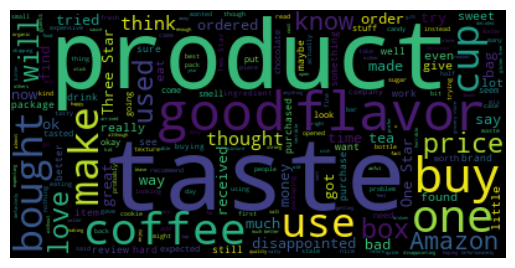

In [43]:
%%time
cloud = WordCloud().generate(text)
fig = plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')


In [44]:
text = ' '.join(good_reviews_df.review.tolist())
text = re.sub('<[^<]+?>', '', text)

In [45]:
f'{len(text):,}'

'487,973,857'

CPU times: total: 3min 56s
Wall time: 4min 6s


(-0.5, 399.5, 199.5, -0.5)

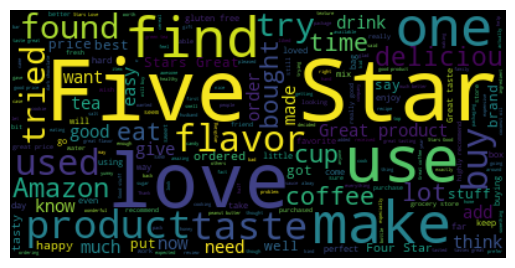

In [46]:
# %%time
cloud2 = WordCloud().generate(text)
fig2 = plt.imshow(cloud2, interpolation='bilinear')
plt.axis('off')

In [48]:
df.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review
0,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",5,0,0,N,Y,2015-08-31,Using these for years - love them. As a family...
1,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",5,0,0,N,Y,2015-08-31,"Wonderful My favorite nut. Creamy, crunchy, s..."
2,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,5,0,0,N,N,2015-08-31,Five Stars This green tea tastes so good! My g...
3,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,5,0,0,N,Y,2015-08-31,Five Stars I love Melissa's brand but this is ...
4,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",5,0,0,N,Y,2015-08-31,Five Stars good


In [49]:
# %time 
df2 = pd.read_csv('data/amazon_reviews_multilingual_US_v1_00.tsv', sep='\t', quoting=csv.QUOTE_NONE)

CPU times: total: 58.8 s
Wall time: 1min 1s


In [52]:
df2.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', 'Pet Products'], dtype=object)

In [53]:
df2.shape

(6931166, 15)

In [60]:
df2.fillna('', inplace=True)
df2['review'] = (df2.review_headline + ' ' + df2.review_body).str.strip()

In [56]:
df2.nunique()

marketplace                1
customer_id          4112395
review_id            6931166
product_id             86899
product_parent         16315
product_title          52382
product_category          38
star_rating                5
helpful_votes           1569
total_votes             1712
vine                       2
verified_purchase          2
review_headline      3412340
review_body          6424373
review_date             6915
review               6517479
dtype: int64

In [61]:
print(df2[df2.review_body.isna()].shape)
df2[df2.review_body.isna()].head()

(0, 16)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review


In [59]:
print(df2[df2.review_headline.isna()].shape)
df2[df2.review_headline.isna()].head()

(74, 16)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review
144995,US,51263804,RRR6EK045G5YL,630438551X,212477251,Romeo & Juliet [VHS],Video,5,4,8,N,N,NaN,I consider myself to be a pretty much diehard ...,2001-03-21,NaN
274671,US,34490235,R25MC0QXPV5CRZ,6305949980,664817538,The Nightmare Before Christmas (Special Edition),Video DVD,4,1,6,N,N,NaN,"Three words, \\""BEST MOVIE EVER.\\"" If you hav...",2002-12-11,NaN
373462,US,23532323,R1MNPI81JJ62NI,B0000DD7NL,868764779,The Diary of Alicia Keys,Music,5,0,2,N,N,NaN,I love this cd! My favorite two songs are:<br...,2004-01-12,NaN
450504,US,43058957,RIHK7J9KBB62V,B00005V3Z4,681790048,Donnie Darko (Widescreen Edition),Video DVD,4,3,8,N,N,NaN,It actually is pretty hard to classify this mo...,2004-11-18,NaN
515665,US,34215909,R1HAKDWL5X86B9,B00014NE62,59241661,Maurice - The Merchant Ivory Collection,Video DVD,4,2,3,N,N,NaN,"Goes at quite a steady pace, however, this is ...",2005-08-12,NaN


#### Drop uneeded columns

In [64]:
df2.drop(['marketplace','review_headline','review_body'], axis=1, inplace=True)

#### Reduce memory profile

In [65]:
optimize_mem_usage(df2)

Memory usage of dataframe is 6,906,306,968 bytes
Memory usage after optimization is: 4,659,289,449 bytes
Decreased by -32.54%


In [132]:
df2.to_parquet('data/amazon_reviews_multilingual_US_v1_00.parquet')

ArrowInvalid: ("Could not convert <pyarrow.StringScalar: '!  AMAZING ! What can i say !  first don`t pay attention to  those who call them sealves a METALLICA FANS because they dont know what music treasure they have in their possession . one thing to say about this album ! AMAZING!'> with type pyarrow.lib.StringScalar: did not recognize Python value type when inferring an Arrow data type", 'Conversion failed for column review with type category')

In [135]:
df2[df2.review.apply(lambda x: '!  AMAZING ! What can i say !  first don`t pay attention to  those who call them sealves a METALLICA FANS because they dont know what music treasure they have in their possession . one thing to say about this album ! AMAZING!' in x)].review.iloc[0]

'!  AMAZING ! What can i say !  first don`t pay attention to  those who call them sealves a METALLICA FANS because they dont know what music treasure they have in their possession . one thing to say about this album ! AMAZING!'

In [126]:
optimize_mem_usage(df2)

Memory usage of dataframe is 4,714,378,709 bytes
Memory usage after optimization is: 4,714,378,709 bytes
Decreased by 0.00%


In [131]:
df2.review.cat.remove_unused_categories(inplace=True)

C:\Users\E079051\AppData\Local\Temp\ipykernel_2440\1673859429.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df2.review.cat.remove_unused_categories(inplace=True)


In [123]:
df2 = df2[~df2.review.apply(lambda x: '' in x)]

In [72]:
import demoji

In [75]:
test = df2[df2.review.apply(lambda x: '🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌' in x)]

In [93]:
pd.DataFrame([{'review':' '.join(set(demoji.findall_list(x)))} for x in test.review.tolist()])

,review
0,grinning cat with smiling eyes raising hands
1,raising hands grinning face winking face with ...
2,person raising hand raising hands kissing cat
3,raising hands
4,smiling cat with heart-eyes raising hands waxi...
5,winking face smiling face with halo smiling fa...
6,blue heart smiling face with sunglasses smilin...
7,sparkler open hands postbox heart with ribbon ...
8,clapping hands raising hands
9,raising hands smiling face with heart-eyes


In [97]:
test.review

5935927    YURS FINALLY 🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌😸😸😸😸😸😸😸😸😸 YES I...
6108759    minecraft ROCKS I love minecraft because you c...
6252505    AWESOME I LOVE THIS GAME!🙌 This is the best ga...
6257026    good game Never  gliches and you don't have bu...
6295515    super fun 🌒😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌...
6339028    I love this app Best game ever I love this gam...
6435836    the bests 😄💙😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊...
6529257    I luv fnaf 😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍...
6644585    Awsome This game is awesome I had to download ...
6664281    AWESOME This gam...
6702016    awesome 🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🐈🐈🐈🐈🐈🐈🐈🐈🐈🐈🐈🐈🐈...
6899188    🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌🙌 Crossy Road is a fun, clean...
Name: review, dtype: category
Categories (6517564, object): ['..., '..., '..., '..., ...

In [99]:
demoji.replace(test.review.iloc[0])

"YURS FINALLY  YES IT'S FINALLY OUT!! It's the end of the series though (maybe), and the whole storyline is scary and sad, but also heartwarming. THANK YOU SCOTT!!!!"

In [113]:
pd.Series(test.review.to_dict()).apply(demoji.replace).tolist()

["YURS FINALLY  YES IT'S FINALLY OUT!! It's the end of the series though (maybe), and the whole storyline is scary and sad, but also heartwarming. THANK YOU SCOTT!!!!",
 'minecraft ROCKS I love minecraft because you can build and mine and discover stuff<br /><br />',
 'AWESOME I LOVE THIS GAME! This is the best game!',
 "good game Never  gliches and you don't have buy anything ",
 'super fun ',
 'I love this app Best game ever I love this game ',
 'the bests  l',
 'I luv fnaf ',
 'Awsome This game is awesome I had to download it on my kindle and my iPod because it was the best thing ever been playing it all the time thumbs up for this game yay',
 'AWESOME\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a This game is totally cool. I like to build and join my friends on it.',
 'awesome ',
 " Crossy Road is a fun, clean, game. Perfect amount of challenging and a great time waster. You get coins and characters easily.I'

In [120]:
df2.product_category.value_counts()

Mobile_Apps                 1474581
Digital_Ebook_Purchase      1248890
Video DVD                   1096886
Digital_Video_Download      1058097
Books                        838801
Music                        778705
Digital_Music_Purchase       107866
Toys                          57777
PC                            57041
Video                         46715
Home Entertainment            36524
Wireless                      22762
Camera                        16978
Video Games                   15474
Electronics                   11459
Musical Instruments           10963
Watches                       10590
Tools                          7510
Shoes                          7383
Baby                           5902
Sports                         4136
Home Improvement               3731
Outdoors                       3195
Office Products                2313
Home                           2007
Kitchen                        1843
Lawn and Garden                1212
Health & Personal Care      